# **Importing Dependencies**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [ ]:
df=pd.read_csv('customer_support_tickets.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 8469 rows and 17 columns


# **Understanding the data**
- Checking null values
- Identifying duplicates
- Observations about data types




In [ ]:
print("column:")
print(df.columns)

column:
Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution', 'Customer Satisfaction Rating'],
      dtype='object')


In [ ]:
# Show the main information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Ticket Priority               8469 non-null   object 
 12  Ticket Channel                8469 non-null   object 
 13  Fir

In [ ]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [ ]:
df.dtypes

,0
Ticket ID,int64
Customer Name,object
Customer Email,object
Customer Age,int64
Customer Gender,object
Product Purchased,object
Date of Purchase,object
Ticket Type,object
Ticket Subject,object
Ticket Description,object


In [ ]:
# Display duplicated rows
df[df.duplicated()]

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating


In [ ]:
df.isnull().sum().sort_values(ascending=True)

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


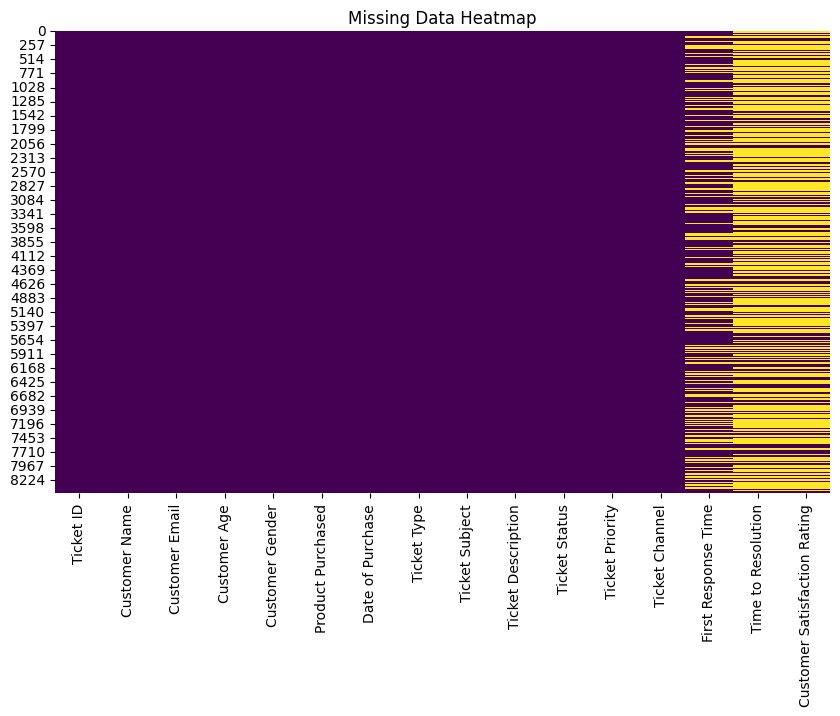

In [ ]:
# Visualize missing values in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# **Basic data Understanding.**
- Explored visual relationships between Ticket Status, Priority, and Channel to understand patterns behind missing values and guide informed imputation strategies.

## Ticket Status Distribution

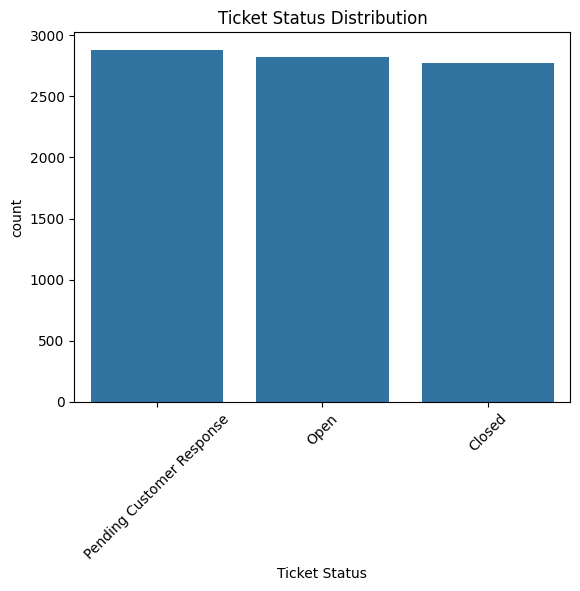

In [ ]:
sns.countplot(data=df, x='Ticket Status', order=df['Ticket Status'].value_counts().index)
plt.title('Ticket Status Distribution')
plt.xticks(rotation=45)
plt.show()

## Ticket Priority Distribution


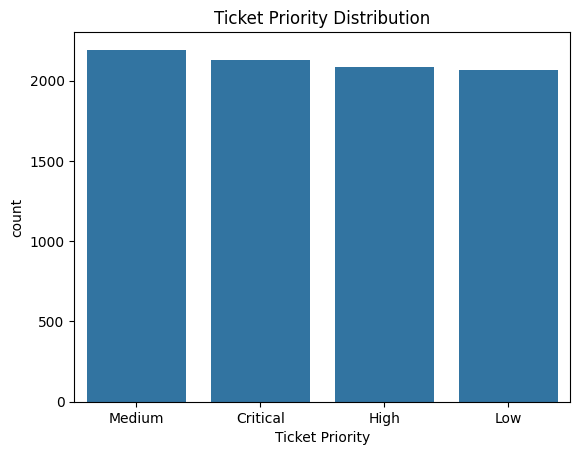

In [ ]:
sns.countplot(data=df, x='Ticket Priority', order=df['Ticket Priority'].value_counts().index)
plt.title('Ticket Priority Distribution')
plt.show()


## Ticket Status vs Ticket Priority

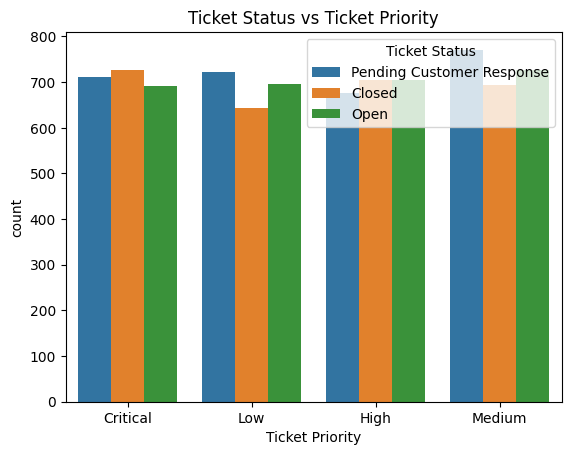

In [ ]:
sns.countplot(data=df, x='Ticket Priority', hue='Ticket Status')
plt.title('Ticket Status vs Ticket Priority')
plt.legend(title='Ticket Status')
plt.show()


## Ticket Channel Usage

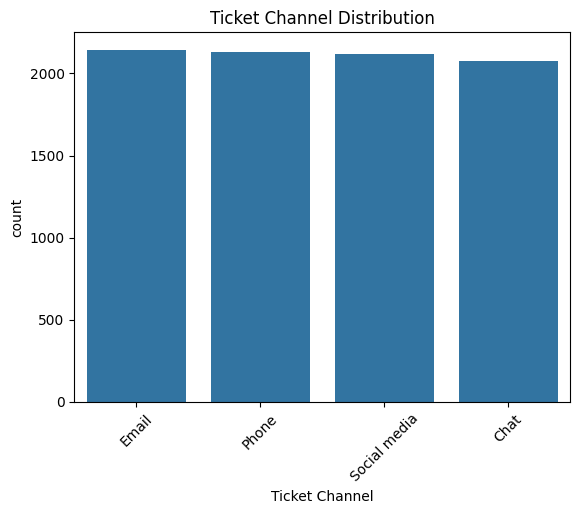

In [ ]:
sns.countplot(data=df, x='Ticket Channel', order=df['Ticket Channel'].value_counts().index)
plt.title('Ticket Channel Distribution')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing and Cleaning.**

## Handling Missing 'First Response Time':


In [ ]:
df['First Response Time'].value_counts()

,count
First Response Time,
2023-06-01 20:45:39,3
2023-06-01 01:21:19,3
2023-06-01 15:21:42,3
2023-06-01 02:20:39,2
2023-06-01 18:55:41,2
...,...
2023-06-01 02:06:02,1
2023-06-01 17:37:01,1
2023-06-01 09:51:59,1


In [ ]:
df['First Response Time'].describe()

,First Response Time
count,5650
unique,5470
top,2023-06-01 20:45:39
freq,3


In [ ]:
df['First Response Time'].unique()

array(['2023-06-01 12:15:36', '2023-06-01 16:45:38',
       '2023-06-01 11:14:38', ..., '2023-06-02 00:36:18',
       '2023-06-01 09:44:22', '2023-06-01 18:28:24'], dtype=object)

# Imputing Missing 'First Response Time'

- Converted 'Date of Purchase' and 'First Response Time' to datetime format.
- Filled missing 'First Response Time' using median per 'Ticket Type'.
- For remaining missing values, estimated time by adding duration to 'Date of Purchase'.
- Verified no missing values remain.









In [ ]:
# Ensure 'Date of Purchase' and 'First Response Time' are in datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')

# Fill missing 'First Response Time' using the group-wise median or mean (by 'Ticket Type')
df['First Response Time'] = df.groupby('Ticket Type')['First Response Time'].transform(
    lambda x: x.fillna(x.median())  # Or use x.mean() if preferred
)

# For any still-missing 'First Response Time', calculate duration on the fly without storing it
missing_mask = df['First Response Time'].isna()
duration_hours = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600
df.loc[missing_mask, 'First Response Time'] = df.loc[missing_mask, 'Date of Purchase'] + pd.to_timedelta(
    duration_hours[missing_mask], unit='h'
)

# Ensure 'Date of Purchase' and 'First Response Time' are in datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')

# Fill missing 'First Response Time' using the group-wise median or mean (by 'Ticket Type')
df['First Response Time'] = df.groupby('Ticket Type')['First Response Time'].transform(
    lambda x: x.fillna(x.median())  # Or use x.mean() if preferred
)

# For any still-missing 'First Response Time', calculate duration on the fly without storing it
missing_mask = df['First Response Time'].isna()
duration_hours = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600
df.loc[missing_mask, 'First Response Time'] = df.loc[missing_mask, 'Date of Purchase'] + pd.to_timedelta(
    duration_hours[missing_mask], unit='h'
)

# Final check
missing_after_filling = df['First Response Time'].isna().sum()
print(f'Missing values in \"First Response Time\" after filling: {missing_after_filling}')
print(df.head())

Missing values in "First Response Time" after filling: 0
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  

## Handling Time to Resolution Column

In [ ]:
df['Time to Resolution'].value_counts()

,count
Time to Resolution,
2023-06-01 17:14:42,3
2023-06-01 14:53:35,2
2023-06-01 14:49:41,2
2023-06-01 21:15:52,2
2023-06-01 15:07:09,2
...,...
2023-06-01 08:58:44,1
2023-06-01 15:08:49,1
2023-06-01 06:32:57,1


In [ ]:
df['Time to Resolution'].unique()

array([nan, '2023-06-01 18:05:38', '2023-06-01 01:57:40', ...,
       '2023-06-01 06:58:07', '2023-06-01 04:31:22',
       '2023-06-01 05:32:24'], dtype=object)

# Calculating and Imputing 'Time to Resolution'

This step computes the **'Time to Resolution'** as the time difference in hours between the customer's **'First Response Time'** and their **'Date of Purchase'**. The missing values in this new feature are filled using a two-step median imputation strategy:

1. **Group-wise Median Imputation:**  
   Missing values are filled using the median 'Time to Resolution' for each **'Ticket Type'**.
2. **Global Median Imputation:**  
   Any remaining missing values are filled using the overall median of the 'Time to Resolution' column.



In [ ]:
# Calculate 'Time to Resolution' as the difference between 'First Response Time' and 'Date of Purchase'
df['Time to Resolution'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600

# Fill missing 'Time to Resolution' using group-wise median by 'Ticket Type'
df['Time to Resolution'] = df.groupby('Ticket Type')['Time to Resolution'].transform(
    lambda x: x.fillna(x.median())
)

# Fill any remaining NaNs with the overall median of 'Time to Resolution'
df['Time to Resolution'].fillna(df['Time to Resolution'].median(), inplace=True)

# Verify that no missing values remain
missing_after_filling = df['Time to Resolution'].isna().sum()
print(f'Missing values in \"Time to Resolution\" after filling: {missing_after_filling}')

# View first few rows
print(df.head())


Missing values in "Time to Resolution" after filling: 0
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \

## Handling Customer Satisfaction Rating Column

In [ ]:
df['Customer Satisfaction Rating'].dtype

dtype('float64')

count    2769.000000
mean        2.991333
std         1.407016
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer Satisfaction Rating, dtype: float64


<Axes: ylabel='Frequency'>

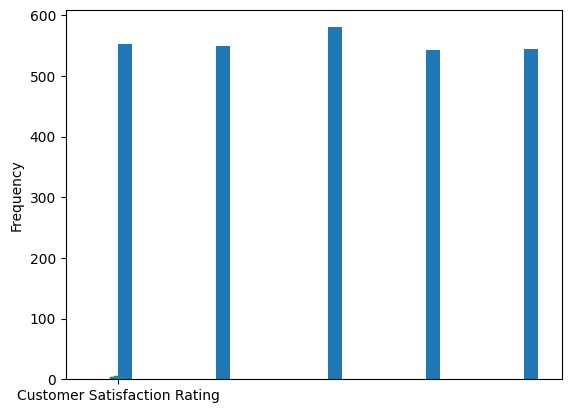

In [ ]:
print(df['Customer Satisfaction Rating'].describe())
df['Customer Satisfaction Rating'].plot(kind='box')
df['Customer Satisfaction Rating'].plot(kind='hist', bins=30)


In [ ]:
df['Customer Satisfaction Rating'].value_counts()

,count
Customer Satisfaction Rating,
3.0,580
1.0,553
2.0,549
5.0,544
4.0,543


## Imputing Missing 'Customer Satisfaction Rating'

- Filled missing values in 'Customer Satisfaction Rating' using median rating grouped by 'Product Purchased'.


In [ ]:
df['Customer Satisfaction Rating'] = df.groupby('Product Purchased')['Customer Satisfaction Rating'].transform(
    lambda x: x.fillna(x.median())
)

##  Converted Ratings to Integers
- We converted the Customer Satisfaction Rating to integers because classification models like RandomForestClassifier require discrete class labels, not continuous values like 2.5. So we rounded the ratings to the nearest whole number to ensure the model works correctly.



In [ ]:
# Round the continuous values to the nearest integer if they are not already whole numbers
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].round().astype(int)

In [ ]:
df['Customer Satisfaction Rating'].value_counts()

,count
Customer Satisfaction Rating,
3,5737
4,820
2,815
1,553
5,544


In [ ]:
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].astype(float)

In [ ]:
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


# **Exploratory Data Analysis (EDA)**

In [ ]:
# Descriptive statistics for numerical columns
numerical_cols = ['Customer Age', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']
print(df[numerical_cols].describe())

       Customer Age            First Response Time  Time to Resolution  \
count   8469.000000                           8469         8469.000000   
mean      44.026804  2023-06-01 11:26:49.605974528        21201.860149   
min       18.000000            2023-05-31 21:55:39        12435.146111   
25%       31.000000            2023-06-01 08:21:01        16811.779583   
50%       44.000000            2023-06-01 11:30:38        21174.788611   
75%       57.000000            2023-06-01 14:34:32        25554.878611   
max       70.000000            2023-06-02 00:54:21        29944.581944   
std       15.296112                            NaN         5069.831602   

       Customer Satisfaction Rating  
count                   8469.000000  
mean                       2.998465  
min                        1.000000  
25%                        3.000000  
50%                        3.000000  
75%                        3.000000  
max                        5.000000  
std                        0.

## Ticket Trends Over Time

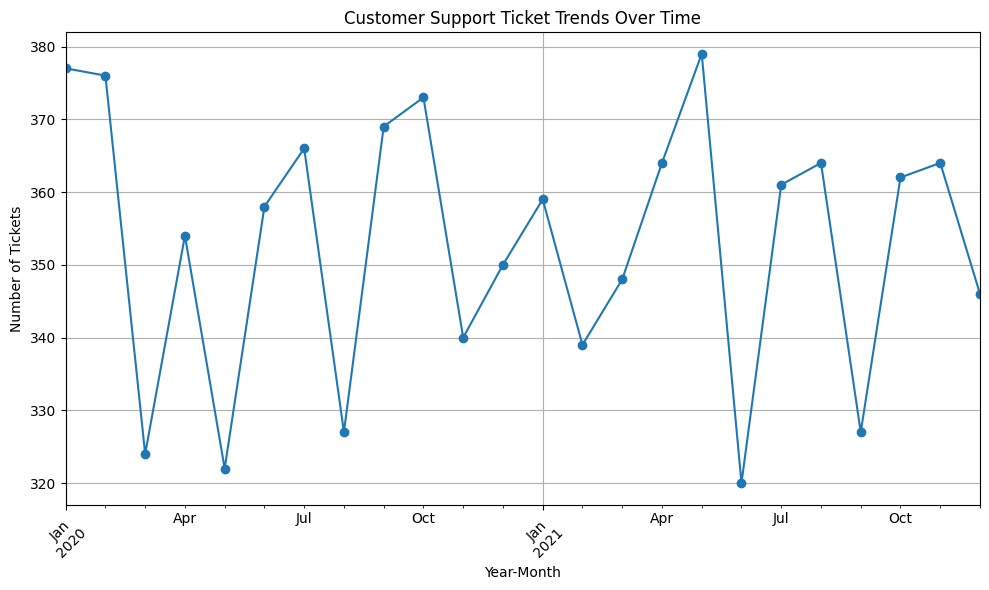

In [ ]:
# Group and count by Year-Month directly without creating a new column
ticket_trends = df.groupby(df['Date of Purchase'].dt.to_period('M')).size()

# Plot ticket trends
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Top 10 Common Issues

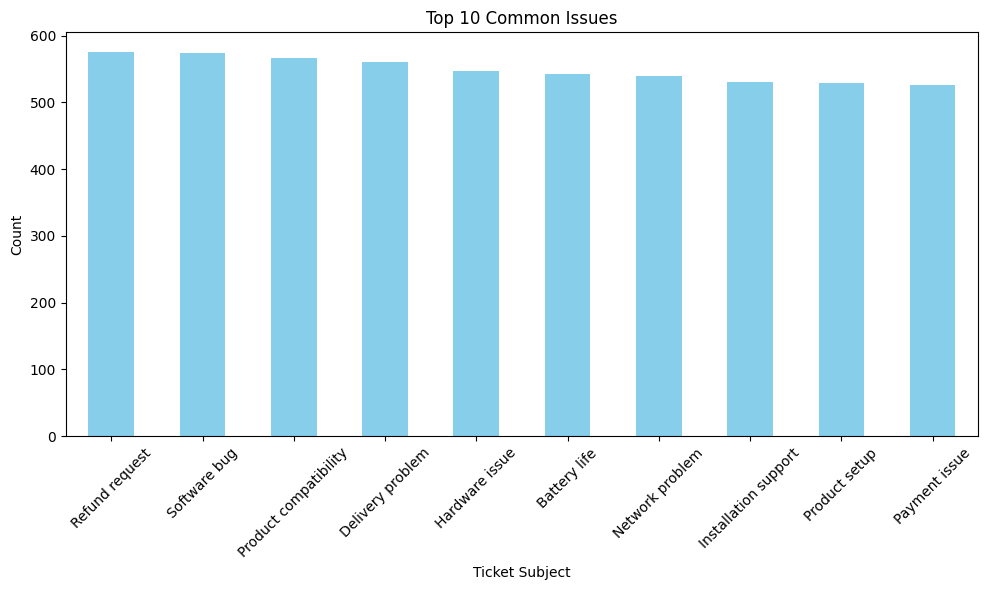

In [ ]:
# Top 10 Common Issues
common_issues = df['Ticket Subject'].value_counts().head(10) # Changed 'data' to 'df'
plt.figure(figsize=(10, 6))
common_issues.plot(kind='bar', color='skyblue')
plt.title('Top 10 Common Issues')
plt.xlabel('Ticket Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ticket Type and Satisfaction Segmentation

In [ ]:
# Segment by Ticket Type
ticket_type_segmentation = df.groupby('Ticket Type').size()
print(ticket_type_segmentation)

# Segment by Customer Satisfaction Rating
satisfaction_segmentation = df.groupby('Customer Satisfaction Rating').size()
print(satisfaction_segmentation)


Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64
Customer Satisfaction Rating
1.0     553
2.0     815
3.0    5737
4.0     820
5.0     544
dtype: int64


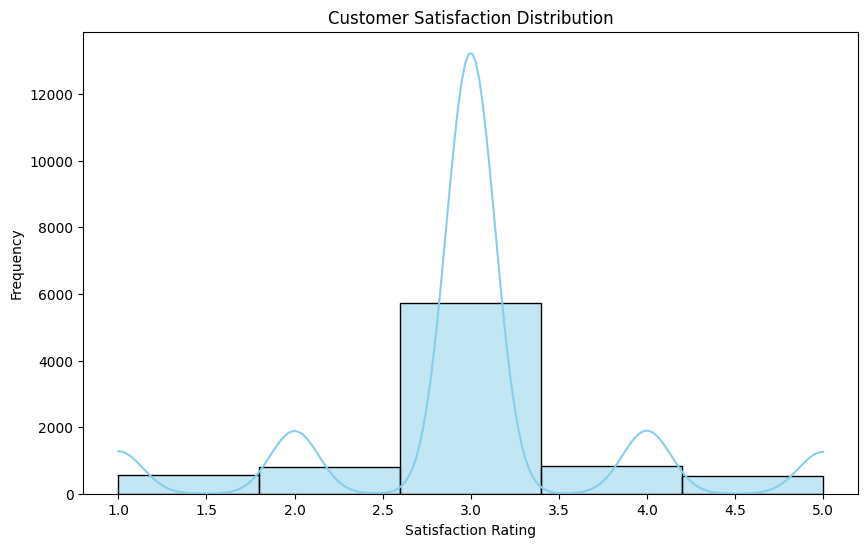

In [ ]:
#Customer Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

##  Ticket Status Distribution

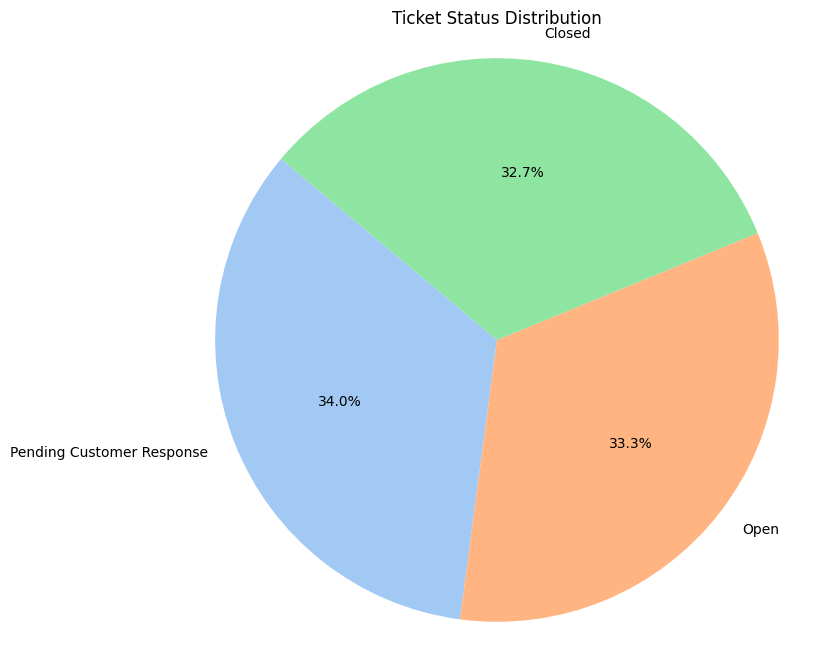

In [ ]:
# Ticket Status Distribution
ticket_status_distribution = df['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

##Customer Demographics (Age and Gender)

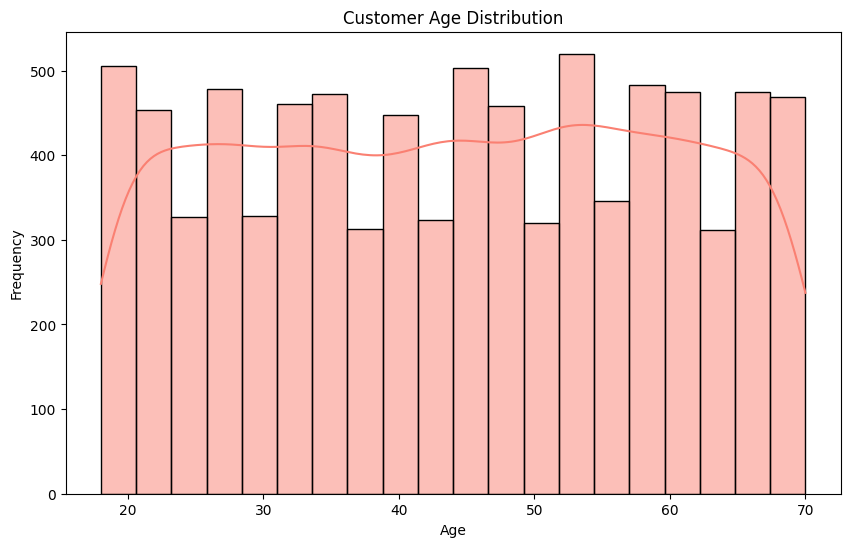

In [ ]:
# Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


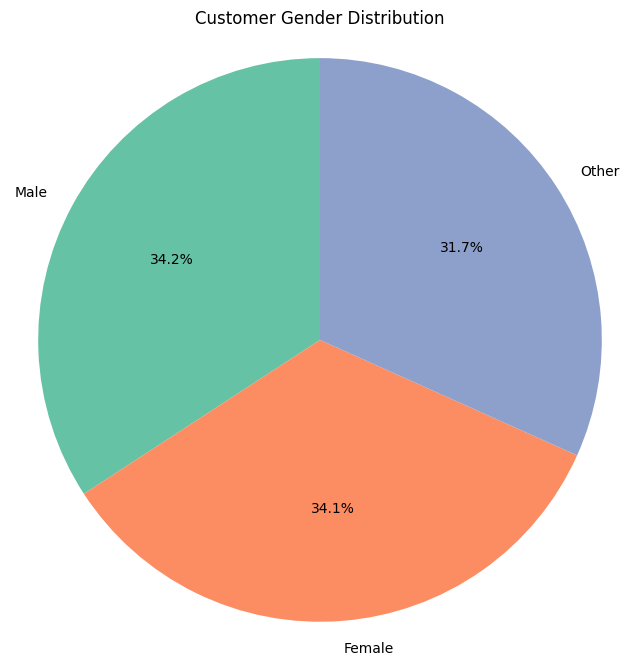

In [ ]:
# Customer Gender Distribution
customer_gender_distribution = df['Customer Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customer_gender_distribution, labels=customer_gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

# Ticket Channel Distribution

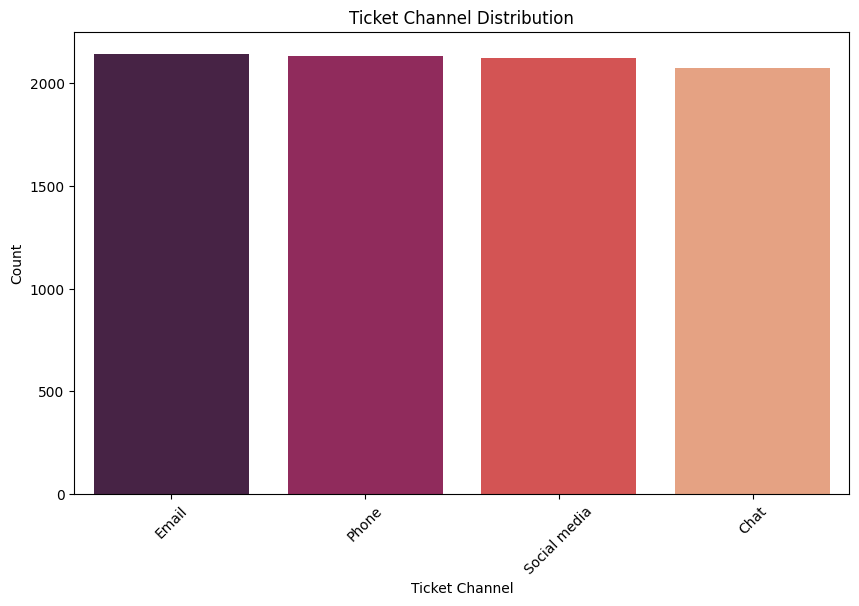

In [ ]:
# Ticket Channel Distribution
plt.figure(figsize=(10, 6))
ticket_channel_distribution = df['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index, y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Satisfaction by Gender

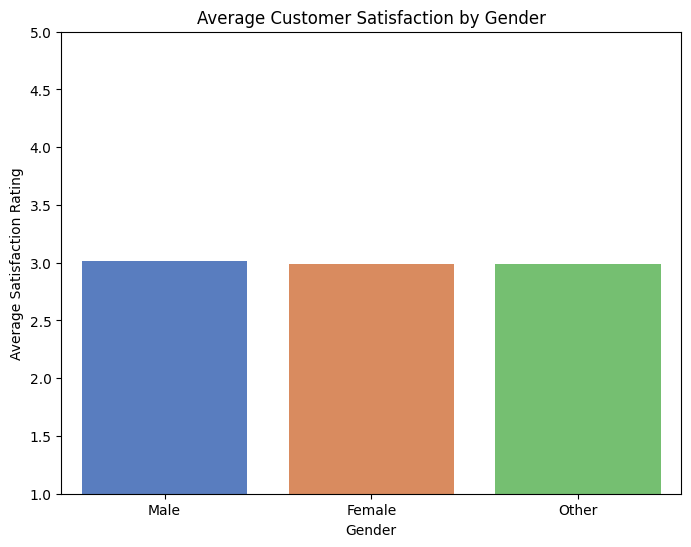

In [ ]:
#Average Customer Satisfaction by Gender
average_satisfaction = df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted', order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5)
plt.show()

## Product Purchased Distribution

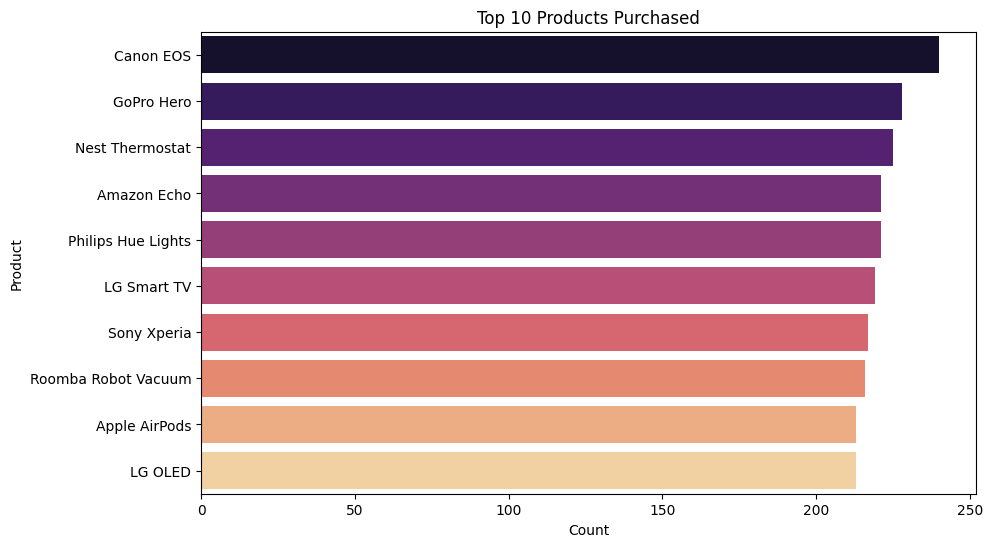

In [ ]:
# Top 10 Products Purchased
product_purchased_distribution = df['Product Purchased'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

## Ticket Type Distribution

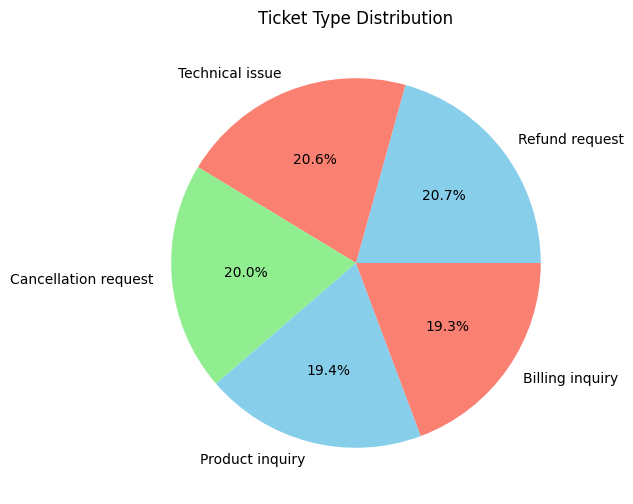

In [ ]:
ticket_type_distribution = df['Ticket Type'].value_counts()

plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(
    kind='pie',
    labels=ticket_type_distribution.index,  # This ensures ticket type names appear
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon', 'lightgreen']
)

plt.title('Ticket Type Distribution')
plt.ylabel('')  # Hide ylabel for cleaner look
plt.show()


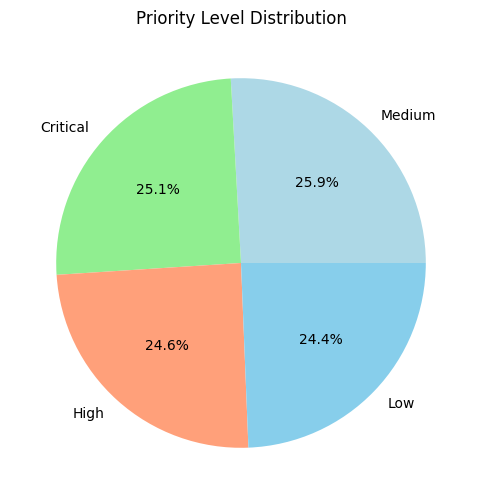

In [ ]:
# Pie Chart: Priority
priority_distribution = df['Ticket Priority'].value_counts()
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
                           colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()


## Age Group Segmentation

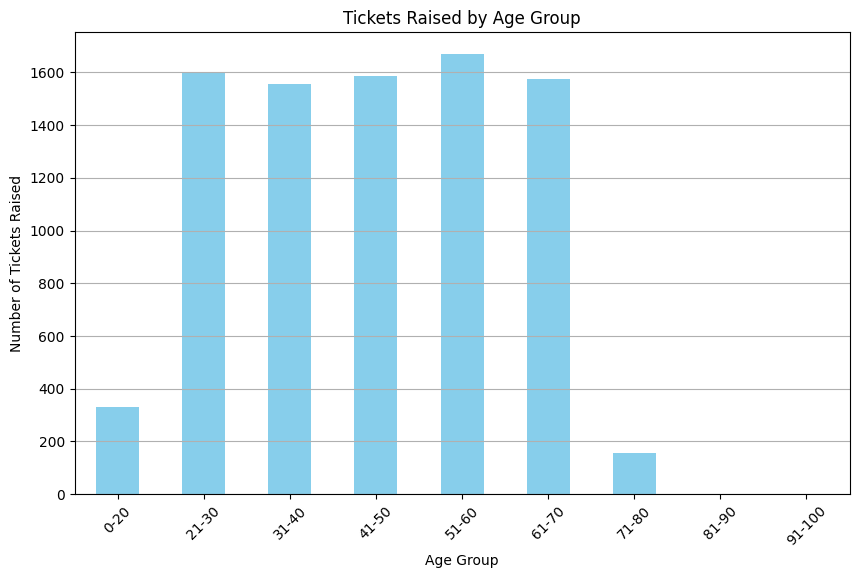

In [ ]:
# Define bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Perform grouping on the fly without creating a new column
age_groups = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)
tickets_by_age_group = age_groups.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##  Facet Grid for Ticket Types

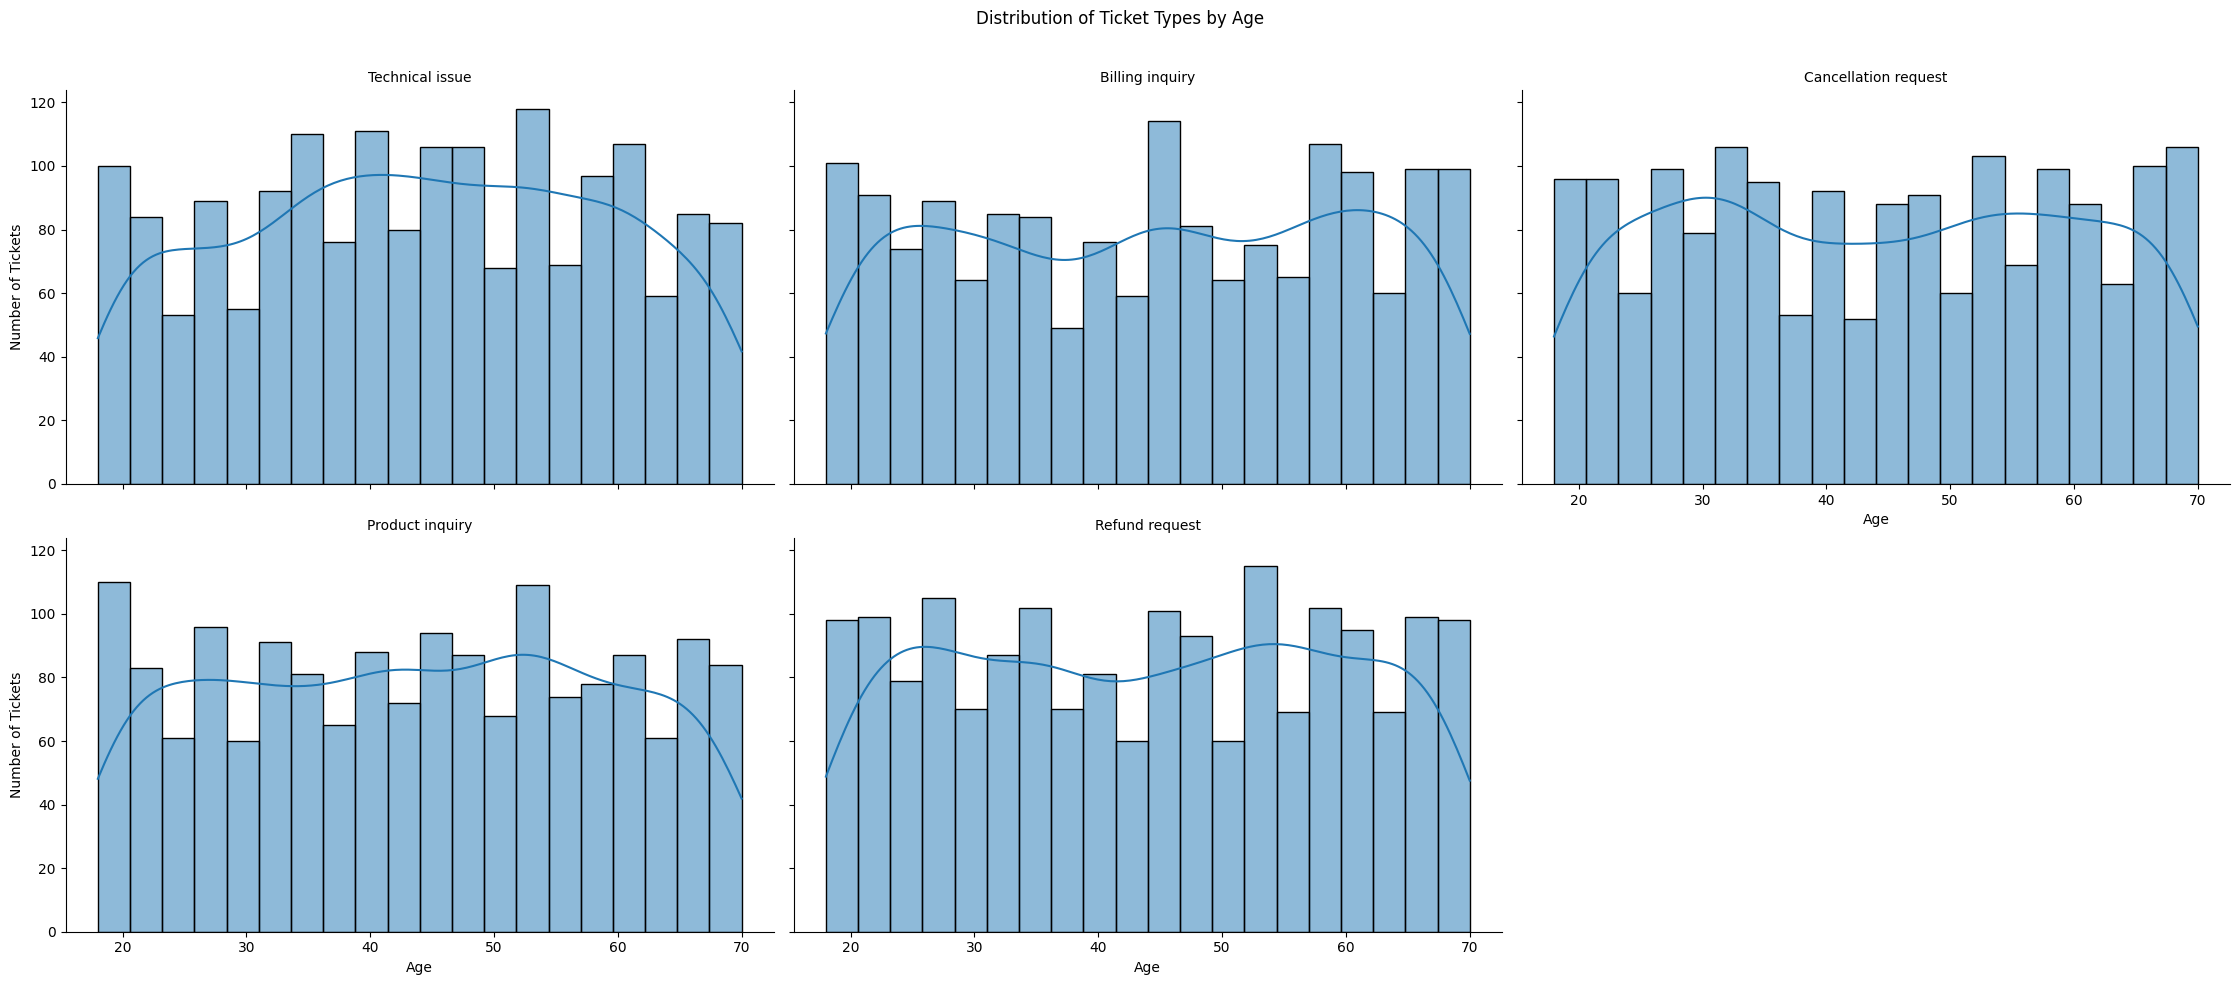

In [ ]:
# Facet Grid for Ticket Types and Customer Age
g = sns.FacetGrid(df, col='Ticket Type', col_wrap=3, height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()

In [ ]:
df.head(5)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,2023-06-01 12:15:36,19236.260000,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,2023-06-01 16:45:38,17776.760556,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:38,25259.243889,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:40,22327.494444,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:42,29112.211667,1.0


# **Feature Engineerng**

In [ ]:
# Extracting features from 'First Response Time'
df['Response Hour'] = df['First Response Time'].dt.hour

#Calculate delay in hours between purchase and first response
df['Response Delay (Hours)'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600

# View result
print(df[['First Response Time', 'Response Hour', 'Response Delay (Hours)']].head())


  First Response Time  Response Hour  Response Delay (Hours)
0 2023-06-01 12:15:36             12            19236.260000
1 2023-06-01 16:45:38             16            17776.760556
2 2023-06-01 11:14:38             11            25259.243889
3 2023-06-01 07:29:40              7            22327.494444
4 2023-06-01 00:12:42              0            29112.211667


In [ ]:
# List of columns to drop
columns_to_drop = ['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Subject', 'Ticket Description', 'First Response Time', 'Date of Purchase']

df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,Time to Resolution,Customer Satisfaction Rating,Response Hour,Response Delay (Hours)
0,32,Other,GoPro Hero,Technical issue,Pending Customer Response,Critical,Social media,19236.260000,3.0,12,19236.260000
1,42,Female,LG Smart TV,Technical issue,Pending Customer Response,Critical,Chat,17776.760556,3.0,16,17776.760556
2,48,Other,Dell XPS,Technical issue,Closed,Low,Social media,25259.243889,3.0,11,25259.243889
3,27,Female,Microsoft Office,Billing inquiry,Closed,Low,Social media,22327.494444,3.0,7,22327.494444
4,67,Female,Autodesk AutoCAD,Billing inquiry,Closed,Low,Email,29112.211667,1.0,0,29112.211667


## Encode categorical columns to numeric labels for modeling
- Columns: Customer Gender, Product Purchased, Ticket Type,
- Ticket Status, Ticket Priority, Ticket Channel


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical columns
cat_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type',
            'Ticket Status', 'Ticket Priority', 'Ticket Channel']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()


,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,Time to Resolution,Customer Satisfaction Rating,Response Hour,Response Delay (Hours)
0,32,2,16,4,2,0,3,19236.260000,3.0,12,19236.260000
1,42,0,21,4,2,0,0,17776.760556,3.0,16,17776.760556
2,48,2,10,4,0,2,3,25259.243889,3.0,11,25259.243889
3,27,0,25,0,0,2,3,22327.494444,3.0,7,22327.494444
4,67,0,5,0,0,2,1,29112.211667,1.0,0,29112.211667


## Feature Correlation Analysis

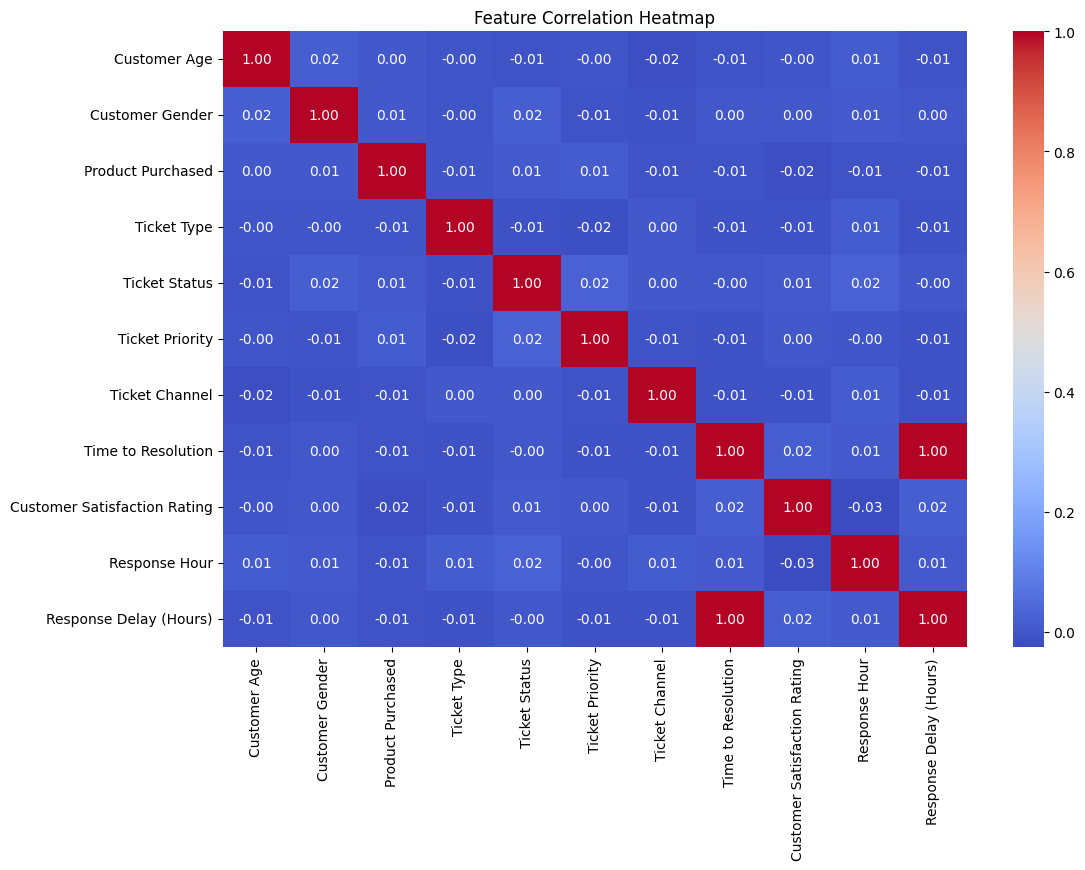

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Conclusion :
-The features in your dataset are largely uncorrelated, indicating low multicollinearity. This is a good sign for models like Random Forests or Decision Trees but may suggest the need for feature engineering or interaction terms if using linear models.










## Model Building..

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE


## Prepare Features and Target

In [ ]:
# Features & target
features = ['Customer Age','Product Purchased','Ticket Type', 'Ticket Status',
            'Time to Resolution','Response Hour', 'Response Delay (Hours)']
X = df[features]
y = df['Customer Satisfaction Rating'].apply(lambda x: 1 if x >= 3 else 0)


## Train-Test Split with Stratification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Handle Imbalance with SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


## Train Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

##  Predict Probabilities & Calculate ROC AUC

In [ ]:
y_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.3f}")


ROC AUC: 0.877


## Precision-Recall Curve and Best Threshold by F1

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold by F1 score: {best_threshold:.3f}")

Best threshold by F1 score: 0.040


##  Plot Precision, Recall, and F1 vs Threshold

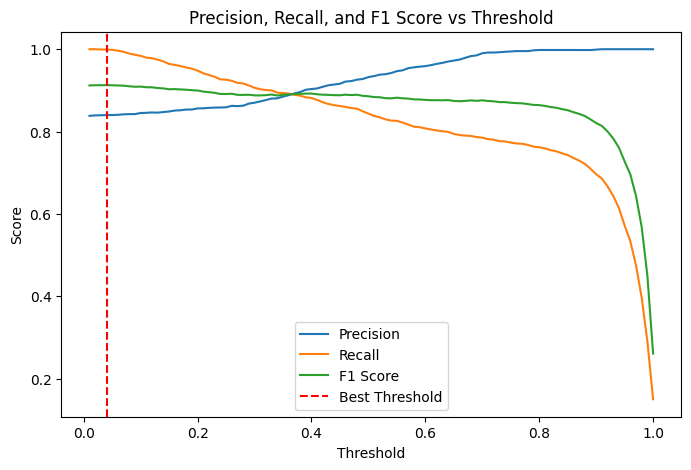

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(x=best_threshold, color='r', linestyle='--', label='Best Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.show()


## ✅ Conclusion

The Random Forest model achieved a strong ROC AUC of 0.877, indicating excellent overall performance. Threshold tuning using the Precision-Recall curve optimized the F1 Score at a low threshold (~0.01), prioritizing high recall. This makes the model suitable for scenarios where capturing all satisfied customers is more important than avoiding false positives. However, if precision is a priority, consider adjusting the threshold accordingly.


##  Final Evaluation using Best Threshold

In [ ]:
y_pred_thresh = (y_proba >= best_threshold).astype(int)
print("Classification Report with tuned threshold:")
print(classification_report(y_test, y_pred_thresh))
print("Confusion Matrix with tuned threshold:")
print(confusion_matrix(y_test, y_pred_thresh))


Classification Report with tuned threshold:
              precision    recall  f1-score   support

           0       0.80      0.01      0.03       274
           1       0.84      1.00      0.91      1420

    accuracy                           0.84      1694
   macro avg       0.82      0.51      0.47      1694
weighted avg       0.83      0.84      0.77      1694

Confusion Matrix with tuned threshold:
[[   4  270]
 [   1 1419]]



Decision Tree Classifier
ROC AUC: 0.782
Best F1 Threshold: 0.000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       274
           1       0.84      1.00      0.91      1420

    accuracy                           0.84      1694
   macro avg       0.42      0.50      0.46      1694
weighted avg       0.70      0.84      0.76      1694

Confusion Matrix:
[[   0  274]
 [   0 1420]]


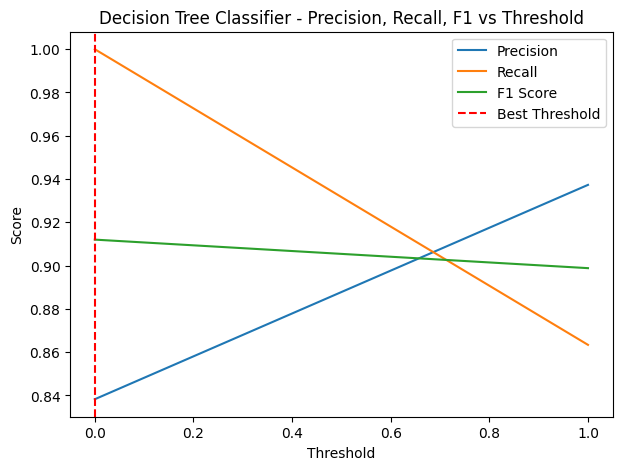

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Evaluation function
def evaluate_model(y_test, y_proba, model_name="Model"):
    roc_auc = roc_auc_score(y_test, y_proba)
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    print(f"\n{model_name}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"Best F1 Threshold: {best_threshold:.3f}")

    y_pred = (y_proba >= best_threshold).astype(int)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, precisions[:-1], label='Precision')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label='Best Threshold')
    plt.title(f'{model_name} - Precision, Recall, F1 vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_sm, y_train_sm)
y_proba_dt = dt.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_proba_dt, "Decision Tree Classifier")



XGBoost Classifier
ROC AUC: 0.906
Best F1 Threshold: 0.083
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.27      0.39       274
           1       0.87      0.98      0.92      1420

    accuracy                           0.86      1694
   macro avg       0.79      0.62      0.66      1694
weighted avg       0.85      0.86      0.84      1694

Confusion Matrix:
[[  73  201]
 [  30 1390]]


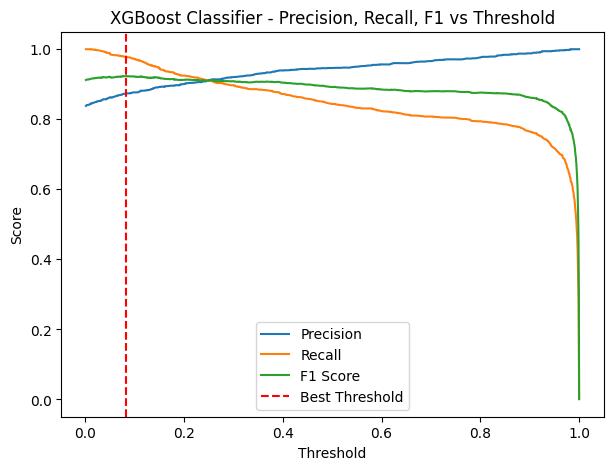

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Evaluation function
def evaluate_model(y_test, y_proba, model_name="Model"):
    roc_auc = roc_auc_score(y_test, y_proba)
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    print(f"\n{model_name}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"Best F1 Threshold: {best_threshold:.3f}")

    y_pred = (y_proba >= best_threshold).astype(int)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, precisions[:-1], label='Precision')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label='Best Threshold')
    plt.title(f'{model_name} - Precision, Recall, F1 vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    scale_pos_weight=(y_train_sm == 0).sum() / (y_train_sm == 1).sum(),
                    random_state=42)
xgb.fit(X_train_sm, y_train_sm)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_proba_xgb, "XGBoost Classifier")

# Conclusion.#
The project successfully implemented a complete machine learning pipeline to predict customer satisfaction using historical survey data. After thorough data preprocessing, exploratory analysis, and feature engineering, multiple classification models were developed and evaluated.

### Among the models tested:###

- Random Forest Classifier achieved high overall accuracy (84%) and a ROC AUC of approximately 0.877. However, it performed poorly on the minority class (dissatisfied customers), with a recall of 0.01 and F1-score of just 0.03 for class 0. This indicates that while it correctly identifies satisfied customers, it struggles to capture dissatisfaction, limiting its real-world value for customer retention efforts.

- Decision Tree Classifier also suffered from extreme class imbalance. With a ROC AUC of 0.782, it completely failed to predict any dissatisfied customers (recall = 0.00, F1 = 0.00 for class 0), showing significant bias toward the majority class and making it unsuitable for this use case.

- XGBoost Classifier delivered the best overall results, achieving a ROC AUC of 0.906. It significantly improved the detection of dissatisfied customers, with a precision of 0.71 and recall of 0.27 for class 0. While not perfect, it provided a more balanced performance across both classes compared to the other models.

While class imbalance remains a challenge (particularly for minority class recall), the XGBoost model offers the most effective and balanced solution. It provides valuable insights into customer satisfaction drivers and serves as a strong foundation for proactive improvements in customer experience strategies.

Future enhancements could include applying advanced resampling techniques like SMOTE, cost-sensitive learning, or collecting more balanced data to further improve minority class performance.

